<a href="https://colab.research.google.com/github/collinsbett1/Nairobi-Hospital-Hypothyroidism-Prediction/blob/main/Nairobi_Hospital_Hypothyroidism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nairobi Hospital Hypothyroidism Prediction

## 1. Defining the Question

## a) Specifying the Question
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## b) Defining the Metric for Success
The accuracy of our models should be above 60% for the project to be declared a success.

## c) Understanding the context
Hyperthyroidism (overactive thyroid) occurs when your thyroid gland produces too much of the hormone thyroxine. Hyperthyroidism can accelerate your body's metabolism, causing unintentional weight loss and a rapid or irregular heartbeat.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. It is this data that will be used to create machine learning models that will help predict if a patient's symptoms indicate they suffer from hyperthyroidism.


# 2. Reading the Data


In [ ]:
# Importing the required libraries
# For data analysis
import pandas as pd
import numpy as np

# For creating visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

# For Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# for creating models 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
# For prevention of warning messages
import warnings
warnings.filterwarnings(action = 'ignore')

# Reading the dataset
df = pd.read_csv('/content/hypothyroid.csv')

In [ ]:
# Previewing the head of the data
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Previewing the tail of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


# 3. Data Understanding

In [ ]:
#getting the info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
# Checking the size of the dataset
df.shape

(3163, 26)

In [ ]:
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# 4. Data Cleaning

In [ ]:
# Checking for null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

> There are no null values

In [ ]:
# Checking for duplicates in the dataset
df.duplicated().sum()

77

In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace= True)

In [ ]:
# Confirming whether the duplicates have been dropped.
df.duplicated().sum()

0

In [ ]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()

# Preview the column names to check for execution
df.columns 

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
#checking the number of times ? appears in each column
(df.iloc[:,1:26] == '?').sum()

age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

In [ ]:
# Replace the '?' with Nan
#
df.replace('?', np.nan, inplace=True)

In [ ]:
# Checking for missing values as a percentage
# Sorting the missing values in a descending order
#
(df.isna().mean().round(4) * 100).sort_values(ascending = False)

tbg                          91.87
t3                           22.03
tsh                          14.74
age                          14.19
tt4                           7.78
t4u                           7.74
fti                           7.71
sex                           2.37
tsh_measured                  0.00
tbg_measured                  0.00
fti_measured                  0.00
t4u_measured                  0.00
tt4_measured                  0.00
t3_measured                   0.00
status                        0.00
lithium                       0.00
tumor                         0.00
sick                          0.00
pregnant                      0.00
query_hyperthyroid            0.00
query_hypothyroid             0.00
thyroid_surgery               0.00
on_antithyroid_medication     0.00
query_on_thyroxine            0.00
on_thyroxine                  0.00
goitre                        0.00
dtype: float64

In [ ]:
# Drop tbg since it has alot of null values
df.drop(['tbg'], axis = 1, inplace = True)

In [ ]:
# Changing datatypes for easier computation

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'tsh_measured', 't3_measured', 
                       'tt4_measured', 't4u_measured', 'fti_measured', 'tbg_measured']

#numerical columns array 
numerical_columns = ['age','tsh','t3', 'tt4', 't4u', 'fti']


# Using a conditional for loop to convert each columns into the right data types

for column in df.columns:
  if column in numerical_columns:
    df[column]= pd.to_numeric(df[column])
  
  else:
    df[column] = df[column].astype('category')
    
    
# checking the data types to confirm changes

df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
dtype: object

In [ ]:
# Filling missing values in numerical columns with mean
for column in numerical_columns:
  df[column].fillna(df[column].mean(), inplace = True)

In [ ]:
# Filling missing values in the sex column with mode
df.sex.fillna(df.sex.mode()[0], inplace = True)

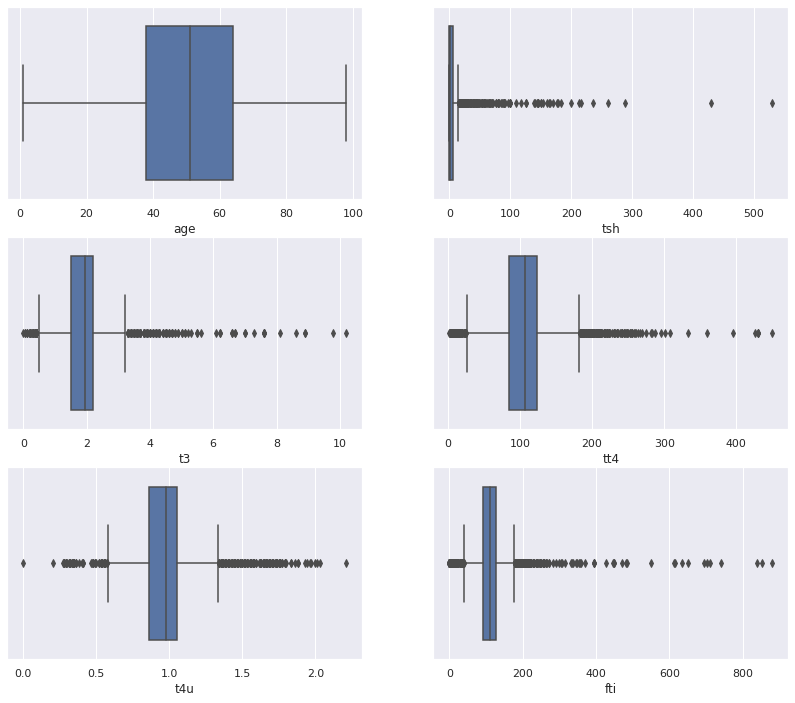

In [ ]:
#checking for outliers
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(14,12))
for ax, data,column in zip(axes.flatten(),df,numerical_columns):
  sns.boxplot(df[column],ax=ax)

## 2. Exploratory Data Analysis.

### 5.1 Univariate Analysis.

#### 5.1.1 Numerical Variables

##### a) Measures of Central Tendancy

In [ ]:
#using for loops to get the mean, mode and median for numerical columns
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: ' + str(df[column].mean()))
  print(column + ', Mode: ' + str(df[column].mode()))
  print(column + ', Median: ' + str(df[column].median()))



age, Mean: 51.11253776435048
age, Mode: 0    51.112538
dtype: float64
age, Median: 51.112537764350456


tsh, Mean: 5.809319650323053
tsh, Mode: 0    0.0
dtype: float64
tsh, Median: 1.0


t3, Mean: 1.9336658354114533
t3, Mode: 0    1.933666
dtype: float64
t3, Median: 1.9336658354114693


tt4, Mean: 108.70692199578384
tt4, Mode: 0    108.706922
dtype: float64
tt4, Median: 107.0


t4u, Mean: 0.9775588338602056
t4u, Mode: 0    0.977559
dtype: float64
t4u, Median: 0.9775588338602027


fti, Mean: 115.48908005617987
fti, Mode: 0    115.48908
dtype: float64
fti, Median: 110.0


##### b) Measures of Dispersion

In [ ]:
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df[column].std()))
  print(column + ', Variance: ' + str(df[column].var()))
  print(column + ', Skewness: ' + str(df[column].skew()))
  print(column + ', Kurtosis: ' + str(df[column].kurt()))
  print(column + ', Quartiles: ' + str(df[column].quantile([0.25,0.5,0.75])))



age, Standard deviation: 17.854430861173032
age, Variance: 318.78070137640805
age, Skewness: -0.18327889150126656
age, Kurtosis: -0.6214515094605133
age, Quartiles: 0.25    38.000000
0.50    51.112538
0.75    64.000000
Name: age, dtype: float64


tsh, Standard deviation: 22.180994332739
tsh, Variance: 491.99650958899974
tsh, Skewness: 11.145456810806497
tsh, Kurtosis: 180.71322067683934
tsh, Quartiles: 0.25    0.00000
0.50    1.00000
0.75    5.80932
Name: tsh, dtype: float64


t3, Standard deviation: 0.86482646769876
t3, Variance: 0.7479248192323144
t3, Skewness: 2.4537697771079516
t3, Kurtosis: 14.89106068829793
t3, Quartiles: 0.25    1.500000
0.50    1.933666
0.75    2.200000
Name: t3, dtype: float64


tt4, Standard deviation: 42.836471205741844
tt4, Variance: 1834.9632653603503
tt4, Skewness: 1.5284024697504315
tt4, Kurtosis: 7.679569618475355
tt4, Quartiles: 0.25     85.0
0.50    107.0
0.75    124.0
Name: tt4, dtype: float64


t4u, Standard deviation: 0.21687326766715972
t4u, Var

#### 5.1.2 Categorical Variables

> Histograms

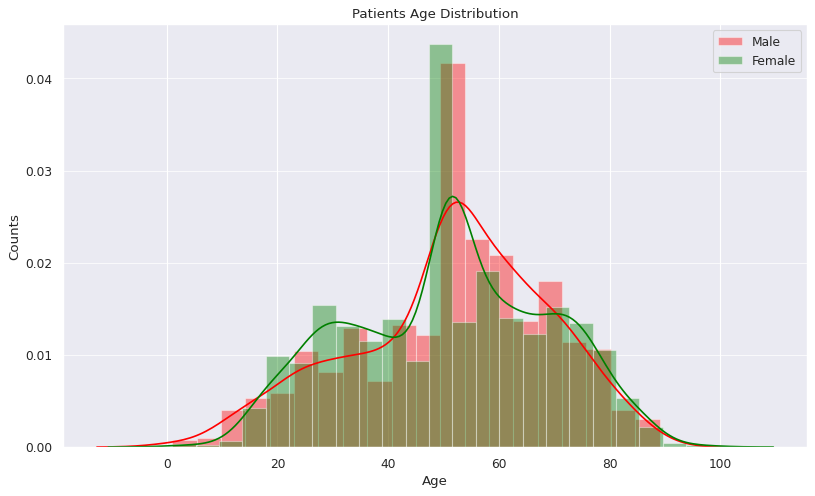

In [ ]:
#visualizing age dirstibution per gender
male = df.loc[df.sex=='M', 'age']    
female = df.loc[df.sex=='F', 'age']

plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="red", label="Male")
sns.distplot(female, color="green", label="Female")
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# value count for status
df.status.value_counts()

negative       2945
hypothyroid     141
Name: status, dtype: int64

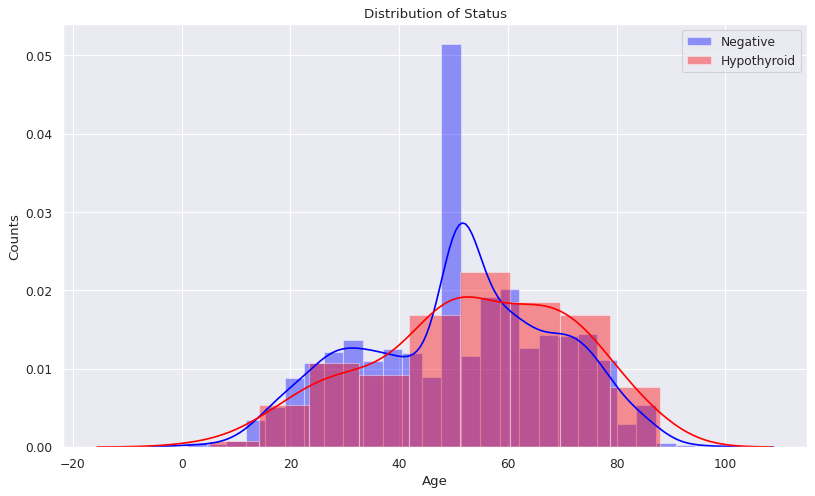

In [ ]:
#visualizing age dirstibution per gender
negative = df.loc[df.status=='negative', 'age']    
hypothyroid = df.loc[df.status=='hypothyroid', 'age']

plt.figure(figsize=(12,7), dpi= 80)

sns.distplot(negative, color="blue", label="Negative")
sns.distplot(hypothyroid, color="red", label="Hypothyroid")
plt.title('Distribution of Status')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend()
plt.show()

### 5.2 Bivariate Analysis.

#### 5.2.1 Numerical and Numerical

##### a) Scatter Plot

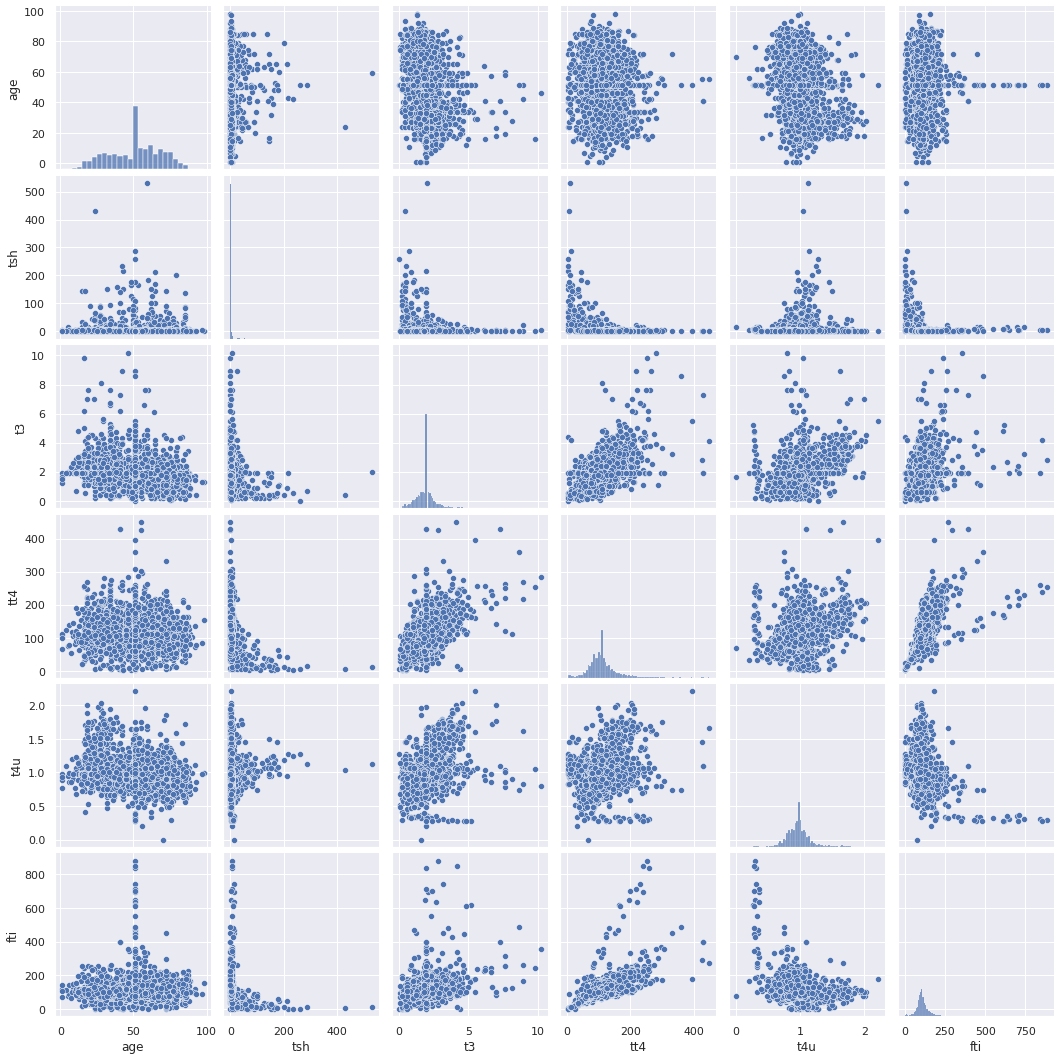

In [ ]:
# Bivariate summaries 
sns.pairplot(df[['age','tsh','t3', 'tt4', 't4u', 'fti']]);

##### b) Correlation

In [ ]:
#this is a summary analysis of the correlation coefficients in the dataset

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,tsh,t3,tt4,t4u,fti
age,1.000000,-0.007352,-0.265743,-0.086317,-0.188786,0.017737
tsh,-0.007352,1.000000,-0.169724,-0.309057,0.072508,-0.240105
t3,-0.265743,-0.169724,1.000000,0.533845,0.386450,0.281517
tt4,-0.086317,-0.309057,0.533845,1.000000,0.320415,0.677345
t4u,-0.188786,0.072508,0.386450,0.320415,1.000000,-0.294437
fti,0.017737,-0.240105,0.281517,0.677345,-0.294437,1.000000


*  Age had a low positive correlation with fti
*  tsh had a low positive correlation wiht t4u
* t3 had a high positive correlation with tt4 and a low positive correlation with t4u and fti
* tt4 has a high positive correlation with t3 and fti

##### c) Bar Charts

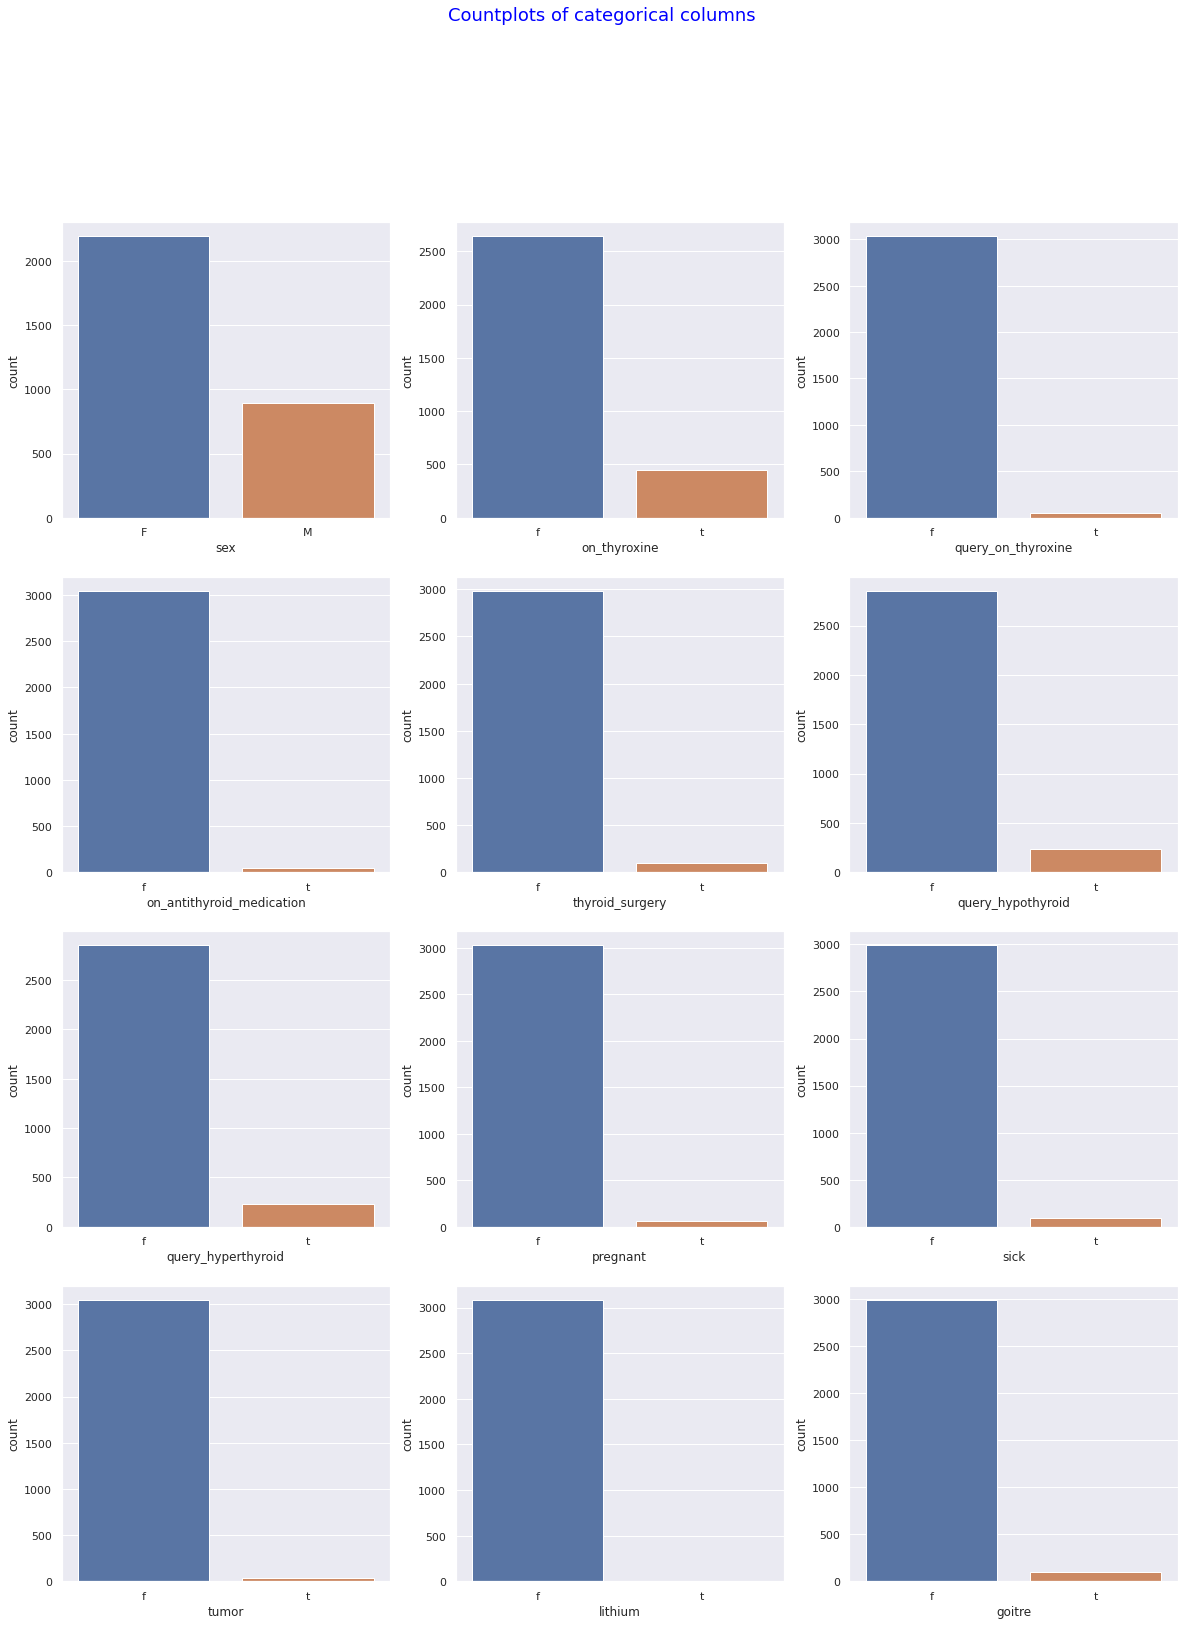

In [ ]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns2 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sns.set(style = 'darkgrid', context = 'notebook')
corr = df.corr()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), df, categorical_columns2):
   sns.countplot(df[column], ax=ax)


## 3. Creating the models.

### 3.1 Random Forest Classifier.

In [ ]:
# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
model = RandomForestClassifier(random_state = 0)
model_ = model.fit(X_train, y_train)

# Making predictions
#
y_pred = model.predict(X_test)

# Measuring the accuracy of the model
#
confusion_matrix(y_test, y_pred)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} f1 score: {f1_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

Accuracy score: 0.9946004319654428 f1 score: 0.9333333333333333


array([[886,   1],
       [  4,  35]])

In [ ]:
# Creating a dataframe of feature importance
feat_importance = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
feat_importance

,importance
feature,
fti,0.2984
tsh,0.2461
tt4,0.2274
t3,0.0628
t4u,0.0450
age,0.0384
on_antithyroid_medication_f,0.0068
query_hypothyroid_t,0.0066
query_hypothyroid_f,0.0061


In [ ]:
# Getting the feature important columns 
feat_importance.index

Index(['fti', 'tsh', 'tt4', 't3', 't4u', 'age', 'on_antithyroid_medication_f',
       'query_hypothyroid_t', 'query_hypothyroid_f',
       'on_antithyroid_medication_t', 'on_thyroxine_t', 'sex_F',
       'on_thyroxine_f', 'thyroid_surgery_t', 'sex_M', 'tsh_measured_y',
       'thyroid_surgery_f', 't3_measured_n', 'tsh_measured_n', 't3_measured_y',
       'sick_f', 'goitre_f', 'sick_t', 'query_hyperthyroid_t',
       'query_hyperthyroid_f', 'goitre_t', 'tbg_measured_y', 'tbg_measured_n',
       'tumor_f', 'pregnant_f', 'tt4_measured_n', 't4u_measured_y',
       'pregnant_t', 'tumor_t', 'fti_measured_n', 'fti_measured_y',
       'lithium_t', 'lithium_f', 'query_on_thyroxine_t',
       'query_on_thyroxine_f', 'tt4_measured_y', 't4u_measured_n'],
      dtype='object', name='feature')

In [ ]:
# Creating a model with the most important features.
# Selecting only important features and the y variable
#
X = X[['fti', 'tsh', 'tt4', 't3', 't4u', 'age', 'on_antithyroid_medication_f',
       'query_hypothyroid_t', 'query_hypothyroid_f',
       'on_antithyroid_medication_t', 'on_thyroxine_t', 'sex_F',
       'on_thyroxine_f', 'thyroid_surgery_t', 'sex_M', 'tsh_measured_y',
       'thyroid_surgery_f', 't3_measured_n', 'tsh_measured_n', 't3_measured_y',
       'sick_f', 'goitre_f', 'sick_t', 'query_hyperthyroid_t',
       'query_hyperthyroid_f', 'goitre_t', 'tbg_measured_y', 'tbg_measured_n',
       'tumor_f', 'pregnant_f', 'tt4_measured_n', 't4u_measured_y',
       'pregnant_t', 'tumor_t', 'fti_measured_n', 'fti_measured_y']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)} f1 score: {f1_score(y_test, y_pred)}')



[[886   1]
 [  4  35]]
Accuracy: 0.9946004319654428 f1 score: 0.9333333333333333


In [ ]:
# Tuning the hyperparameters
# Checking the hyperparameters
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
# Creating a dictionary of parameters to tune
#
parameters = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=parameters, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'Best parameters: {search.best_params_}')

Best parameters: {'max_depth': 5, 'n_estimators': 20}


In [ ]:
# Using the best parameters in a new model
#
# Selecting only important features and the y variable
#
X = X[['fti', 'tsh', 'tt4', 't3', 't4u', 'age', 'on_antithyroid_medication_f',
       'query_hypothyroid_t', 'query_hypothyroid_f',
       'on_antithyroid_medication_t', 'on_thyroxine_t', 'sex_F',
       'on_thyroxine_f', 'thyroid_surgery_t', 'sex_M', 'tsh_measured_y',
       'thyroid_surgery_f', 't3_measured_n', 'tsh_measured_n', 't3_measured_y',
       'sick_f', 'goitre_f', 'sick_t', 'query_hyperthyroid_t',
       'query_hyperthyroid_f', 'goitre_t', 'tbg_measured_y', 'tbg_measured_n',
       'tumor_f', 'pregnant_f', 'tt4_measured_n', 't4u_measured_y',
       'pregnant_t', 'tumor_t', 'fti_measured_n', 'fti_measured_y']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
model1 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state = 0)
model1.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
print(confusion_matrix(y_test, y_pred))
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')

[[886   1]
 [  4  35]]
The accuracy score is: 0.9946004319654428 and the f1 score is 0.9333333333333333


> The results of the two models remain the same.

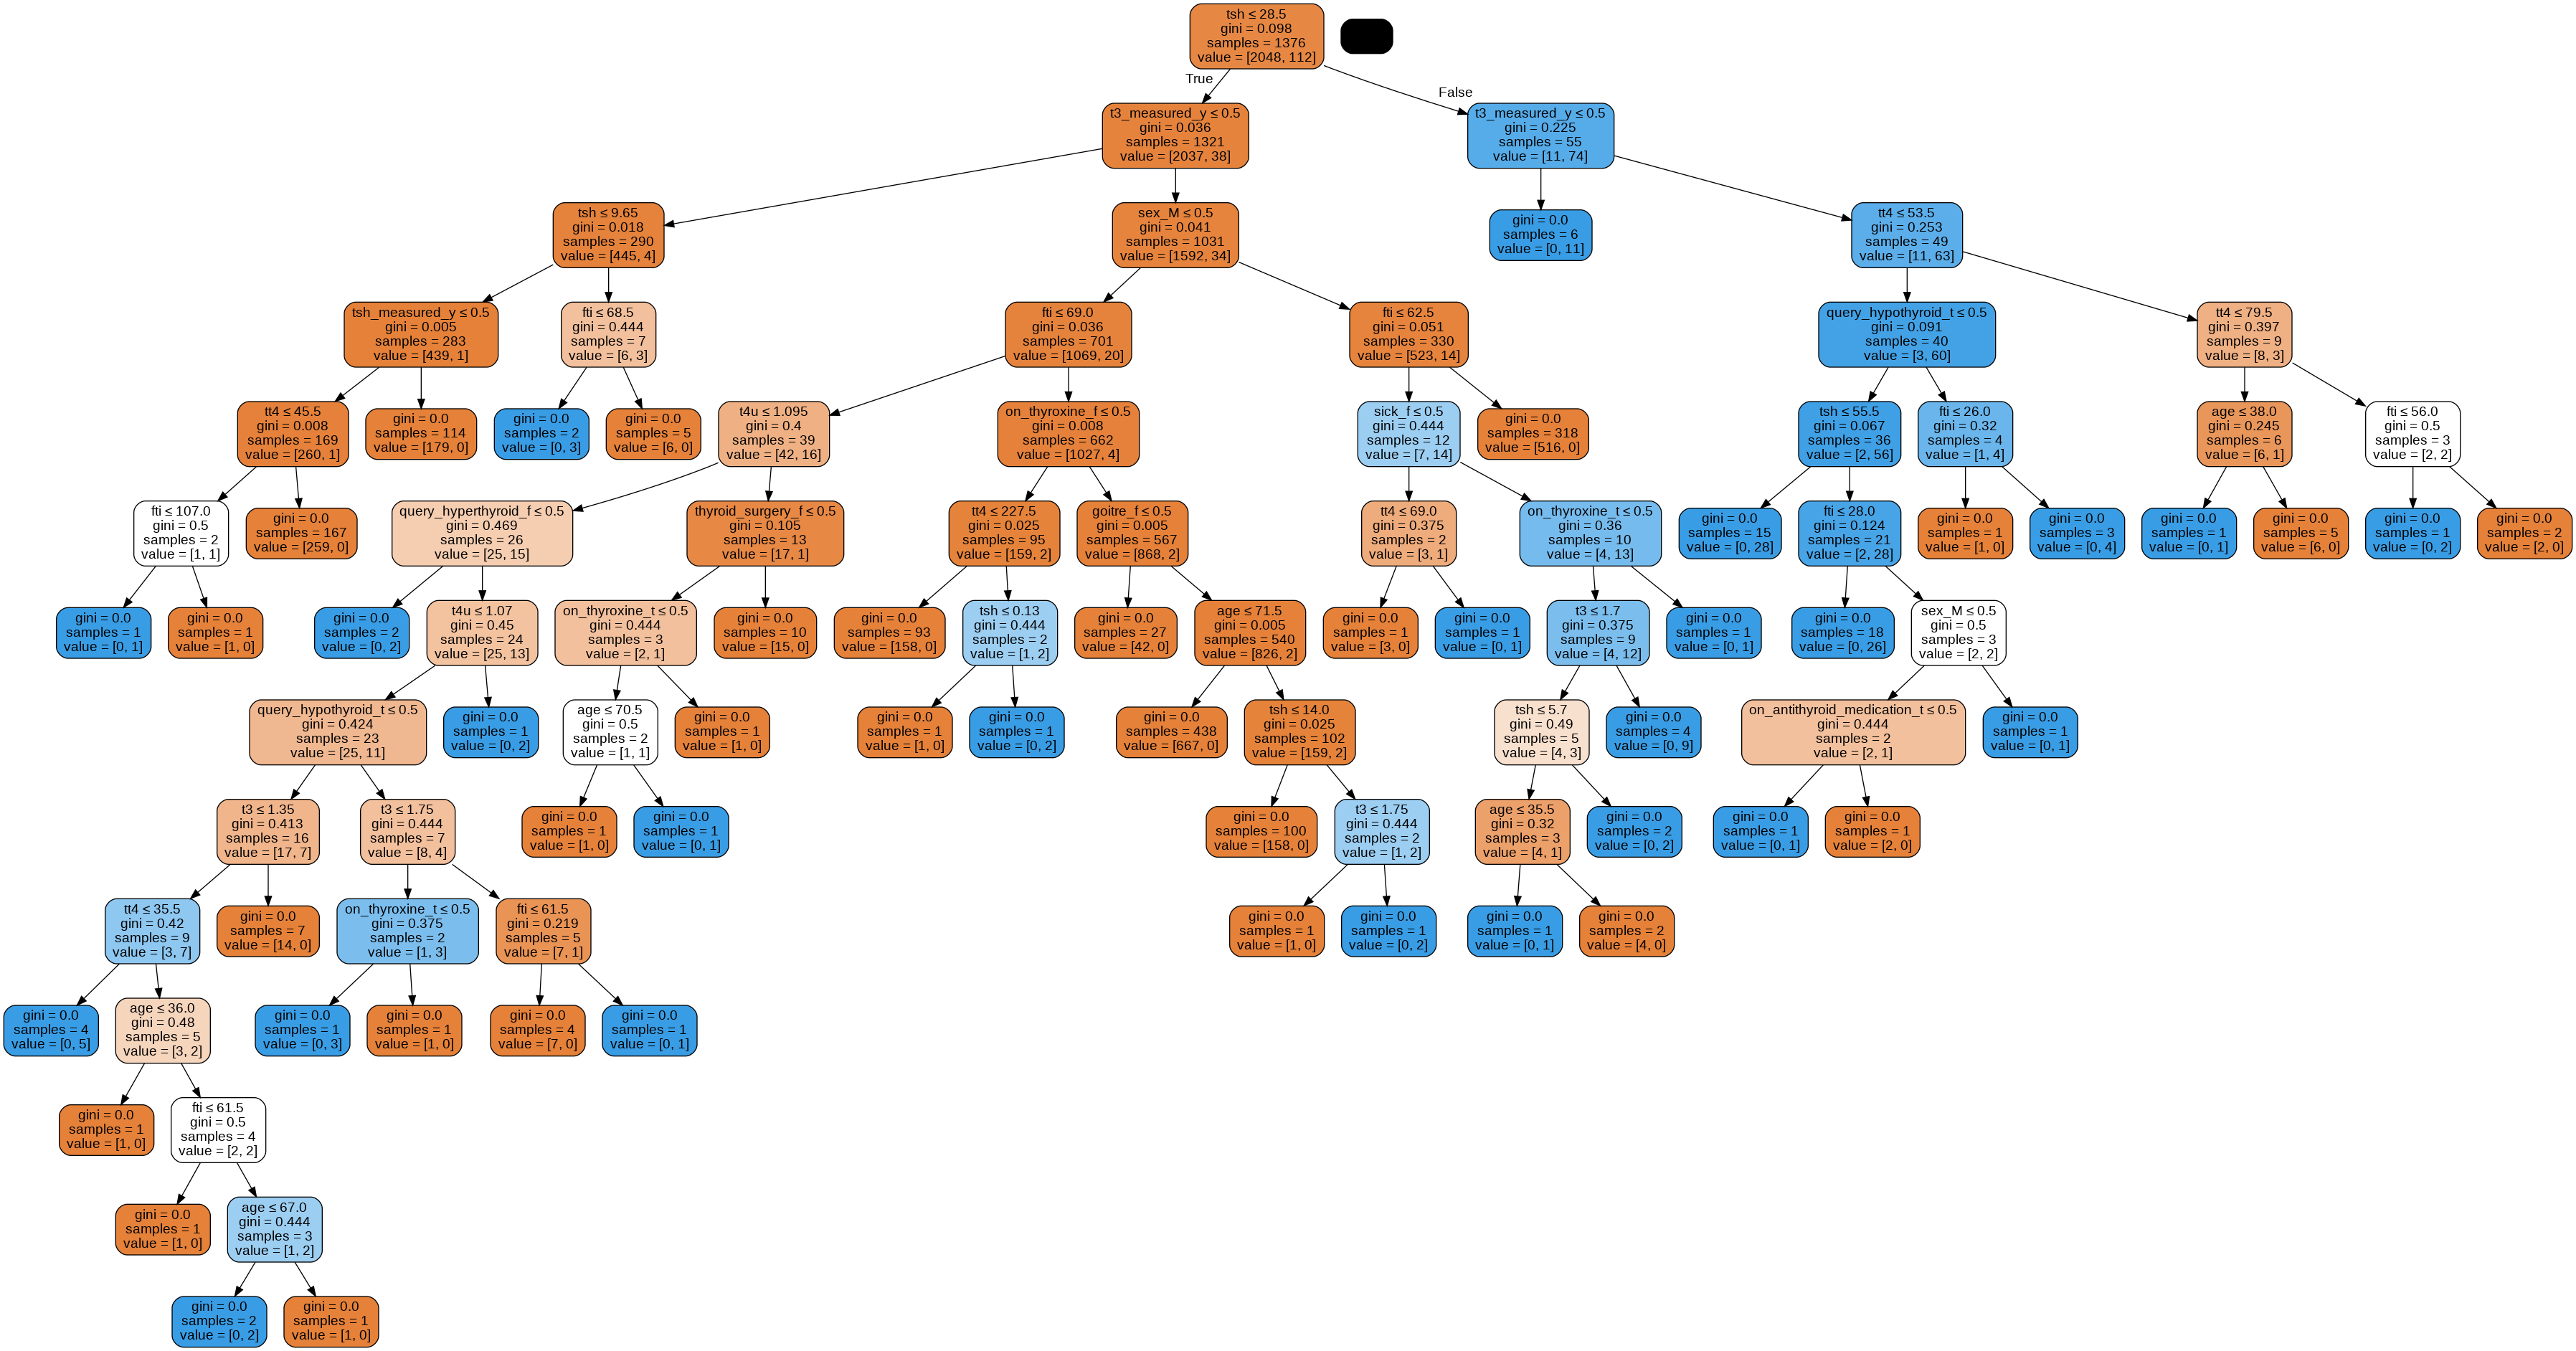

In [ ]:
# picking the 3rd tree from the forest
tree = rf.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 3.2 Adaboost

In [ ]:
# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(random_state = 0)
ada_ = ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)} f1 score: {f1_score(y_test, y_pred)}')

[[885   2]
 [  4  35]]
Accuracy: 0.9935205183585313 f1 score: 0.9210526315789475


> AdaBoost has a lower f1 score compared to RandomForest.

In [ ]:
# Checking for the most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': ada.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
feature_importance.head(40)

,importance
feature,
fti,0.22
age,0.16
tsh,0.16
t3,0.12
tt4,0.12
t4u,0.12
on_antithyroid_medication_f,0.02
query_hypothyroid_f,0.02
thyroid_surgery_f,0.02


In [ ]:
# getting the columns
feature_importance.index

Index(['fti', 'age', 'tsh', 't3', 'tt4', 't4u', 'on_antithyroid_medication_f',
       'query_hypothyroid_f', 'thyroid_surgery_f',
       'on_antithyroid_medication_t', 'on_thyroxine_f', 't4u_measured_y',
       't4u_measured_n', 'fti_measured_n', 'lithium_f', 'tt4_measured_y',
       'fti_measured_y', 'tt4_measured_n', 't3_measured_y', 't3_measured_n',
       'tsh_measured_y', 'tbg_measured_n', 'tsh_measured_n', 'goitre_t',
       'goitre_f', 'lithium_t', 'pregnant_t', 'tumor_t', 'tumor_f', 'sick_t',
       'sick_f', 'pregnant_f', 'query_hyperthyroid_t', 'query_hyperthyroid_f',
       'query_hypothyroid_t', 'thyroid_surgery_t', 'query_on_thyroxine_t',
       'query_on_thyroxine_f', 'on_thyroxine_t', 'sex_M', 'sex_F',
       'tbg_measured_y'],
      dtype='object', name='feature')

In [ ]:
# Using the most important features to create a new model
#
X = X[['fti', 'age', 'tsh', 't3', 'tt4', 't4u', 'on_antithyroid_medication_f',
       'query_hypothyroid_f', 'thyroid_surgery_f',
       'on_antithyroid_medication_t', 'on_thyroxine_f', 't4u_measured_y',
       't4u_measured_n', 'fti_measured_n', 'lithium_f', 'tt4_measured_y',
       'fti_measured_y', 'tt4_measured_n', 't3_measured_y', 't3_measured_n',
       'tsh_measured_y', 'tbg_measured_n', 'tsh_measured_n', 'goitre_t',
       'goitre_f', 'lithium_t', 'pregnant_t', 'tumor_t', 'tumor_f', 'sick_t',
       'sick_f', 'pregnant_f', 'query_hyperthyroid_t', 'query_hyperthyroid_f',
       'query_hypothyroid_t', 'thyroid_surgery_t', 'query_on_thyroxine_t',
       'query_on_thyroxine_f', 'on_thyroxine_t', 'sex_M', 'sex_F',
       'tbg_measured_y']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)


# Measuring the accuracy of the model
#
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)} f1 score:{f1_score(y_test, y_pred)}')




[[885   2]
 [  4  35]]
Accuracy: 0.9935205183585313 f1 score:0.9210526315789475


In [ ]:
# Checking the parameters to tune
AdaBoostClassifier()

AdaBoostClassifier()

In [ ]:
# Create a dictionary of the parameters 
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# The folds were set to 10 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search
search.fit(X, y)

# Printing the best parameters
print(f'Parameters: {search.best_params_}')

Parameters: {'learning_rate': 1, 'n_estimators': 20}


In [ ]:
# Using the tuned parameters in the model
#
X = X[['fti', 'age', 'tsh', 't3', 'tt4', 't4u', 'on_antithyroid_medication_f',
       'query_hypothyroid_f', 'thyroid_surgery_f',
       'on_antithyroid_medication_t', 'on_thyroxine_f', 't4u_measured_y',
       't4u_measured_n', 'fti_measured_n', 'lithium_f', 'tt4_measured_y',
       'fti_measured_y', 'tt4_measured_n', 't3_measured_y', 't3_measured_n',
       'tsh_measured_y', 'tbg_measured_n', 'tsh_measured_n', 'goitre_t',
       'goitre_f', 'lithium_t', 'pregnant_t', 'tumor_t', 'tumor_f', 'sick_t',
       'sick_f', 'pregnant_f', 'query_hyperthyroid_t', 'query_hyperthyroid_f',
       'query_hypothyroid_t', 'thyroid_surgery_t', 'query_on_thyroxine_t',
       'query_on_thyroxine_f', 'on_thyroxine_t', 'sex_M', 'sex_F',
       'tbg_measured_y']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
model2 = AdaBoostClassifier(learning_rate=1, n_estimators=50, random_state = 0)
model2.fit(X_train, y_train)

# Making predictions
#
y_pred = model2.predict(X_test)

# Getting the accuracy of the model
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)} f1 score: {f1_score(y_test, y_pred)}')


[[885   2]
 [  4  35]]
Accuracy: 0.9935205183585313 f1 score: 0.9210526315789475


> The accuracy and f1 score of the two models of the two models remain the same.

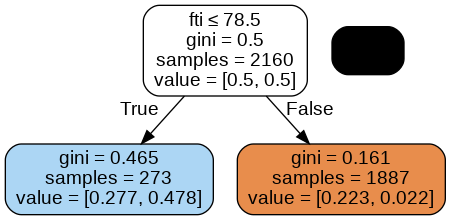

In [ ]:
# picking the 3rd tree from the forest
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada.estimators_[3]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

>> Random forest has a higher accuracy and F1 score and thus is a better model for prediction of hypothyroidism.

### 3.3 Support Vector Classifier

In [ ]:
# Selecting the independent variables and the target variable
#
X = df[['fti', 'tsh']].values
y = np.where(df.status == 'hypothyroid', 1, 0)
#
# Setting the kernel to polinomial
#
polyclass = SVC(kernel='poly',degree=10,gamma='auto')
# Training the model using the training set
polyclass.fit(X_train, y_train)
poly_pred = polyclass.predict(X_test)
accuracy_score(y_test, poly_pred)

print(f'Polynomial> Accuracy: {accuracy_score(y_test, poly_pred)} f1 score:{f1_score(y_test, poly_pred)}')

# Setting the kernel to linear
#
# Building the model 
polyclass2 = SVC(kernel='linear',degree=10,gamma='auto')
# Training the model using the training set
polyclass2.fit(X_train, y_train)
poly_pred2 = polyclass2.predict(X_test)
#
print(f'Linear> Accuracy: {accuracy_score(y_test, poly_pred2)} f1 score:{f1_score(y_test, poly_pred2)}')

# Setting the kernel to rbf
# Building the model 
polyclass3 = SVC(kernel='rbf',degree=10,gamma='auto')
# Training the model using the training set
polyclass3.fit(X_train, y_train)
poly_pred3 = polyclass.predict(X_test)
#
print(f'rbf> Accuracy: {accuracy_score(y_test, poly_pred3)} f1 score:{f1_score(y_test, poly_pred3)}')


Polynomial> Accuracy: 0.9762419006479481 f1 score:0.725
Linear> Accuracy: 0.9892008639308856 f1 score:0.8648648648648648
rbf> Accuracy: 0.9762419006479481 f1 score:0.725


> Linear is the best performing Support VectOr Classifier kerenel. It has the highest accuracy and f1 score.

In [ ]:
# Checking SVC parameters that can be tuned
#
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Tuning the parameters
#
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 and instantiating the model
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
X = df[['fti', 'tsh']]
y = np.where(df.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'gamma': 17.791666666666668, 'C': 81}


In [ ]:
# Using the tuned parameters to create another model
#
X = df.drop('status', axis = 1)

y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using the tuned parameters in the model
svc = SVC(C = 81, gamma = 17.791666666666668, kernel='linear')
svc.fit(X_train, y_train)

# Making predictions
y_pred = svc.predict(X_test)

# Measuring the accuracy of the model
print(confusion_matrix(y_test, y_pred))
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')




[[884   3]
 [  7  32]]
The accuracy score is: 0.9892008639308856 and the f1 score is 0.8648648648648648


## 4. Conclusions.
>

> The best performing model in hypertheroidism prediction is Random Forest classifier with an accuracy of 0.9946 and an f1 score of 0.9333